In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(
    font_scale=2,
    palette=sns.color_palette()
)

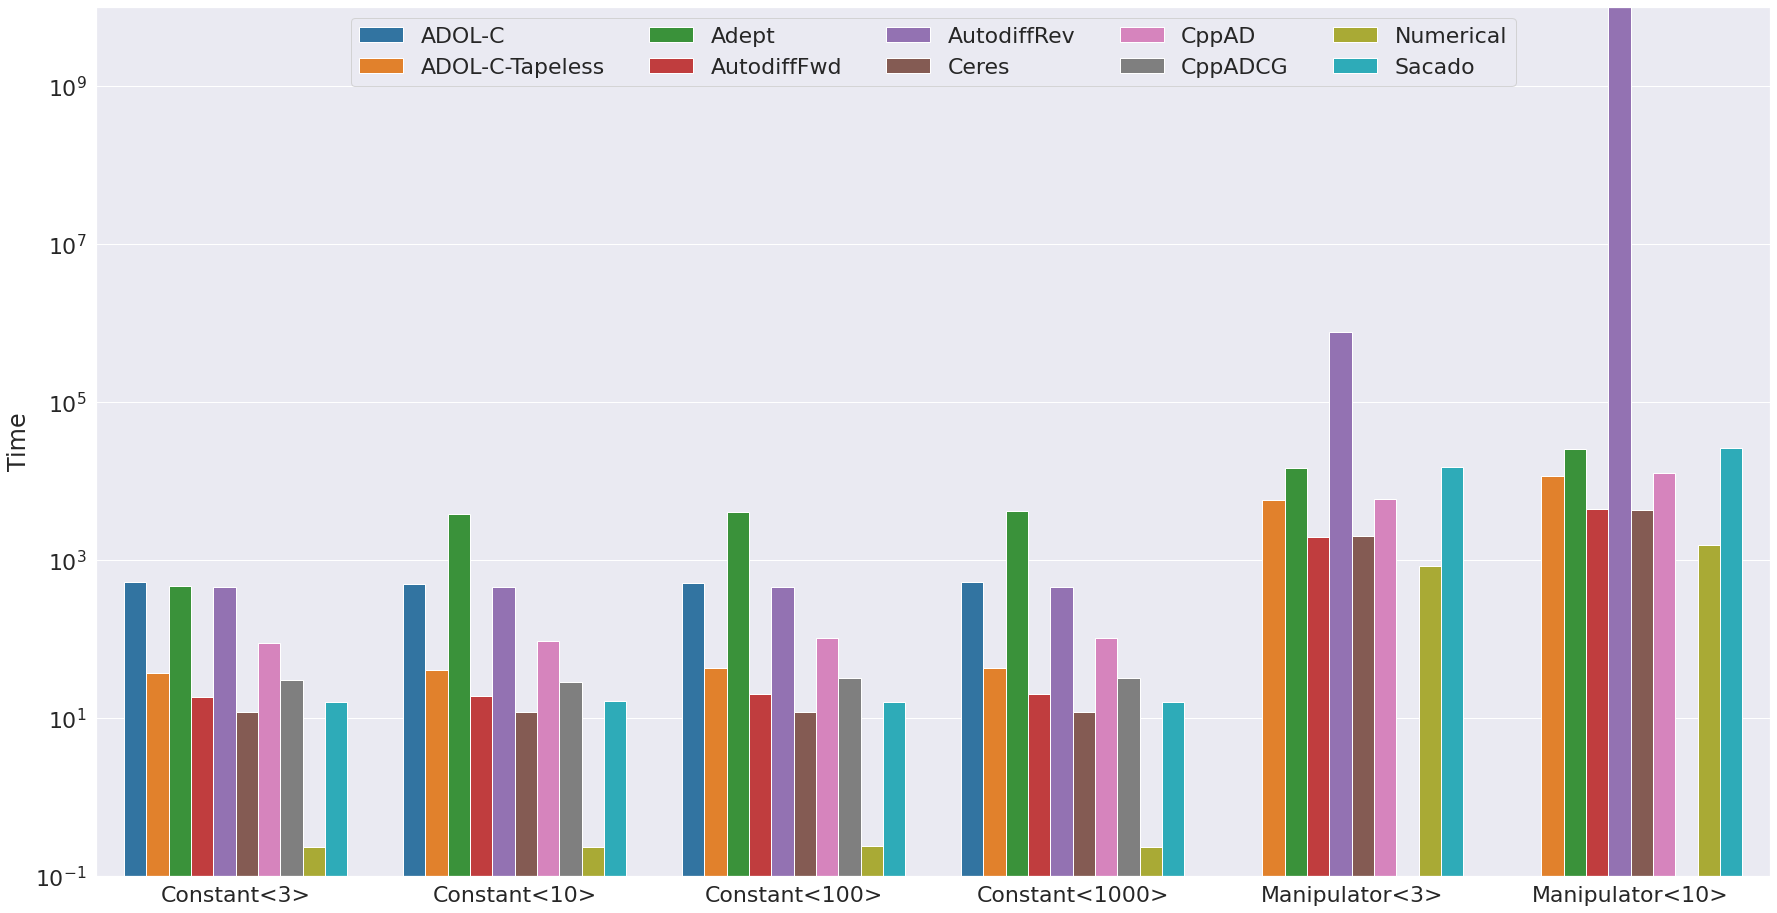

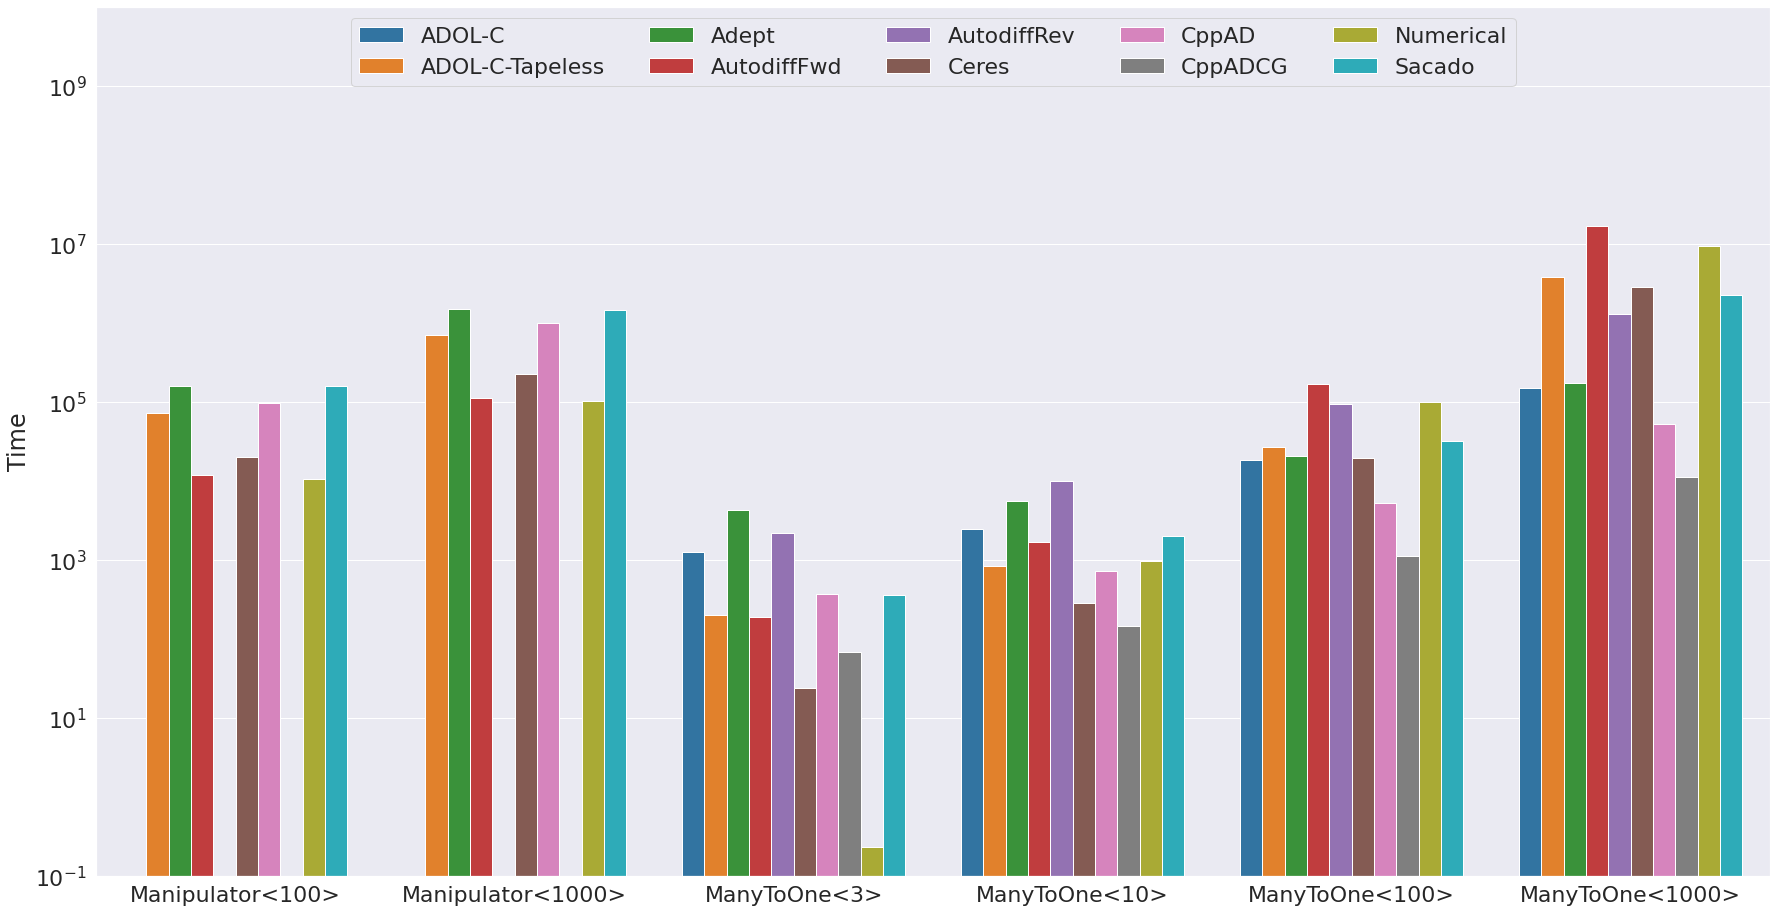

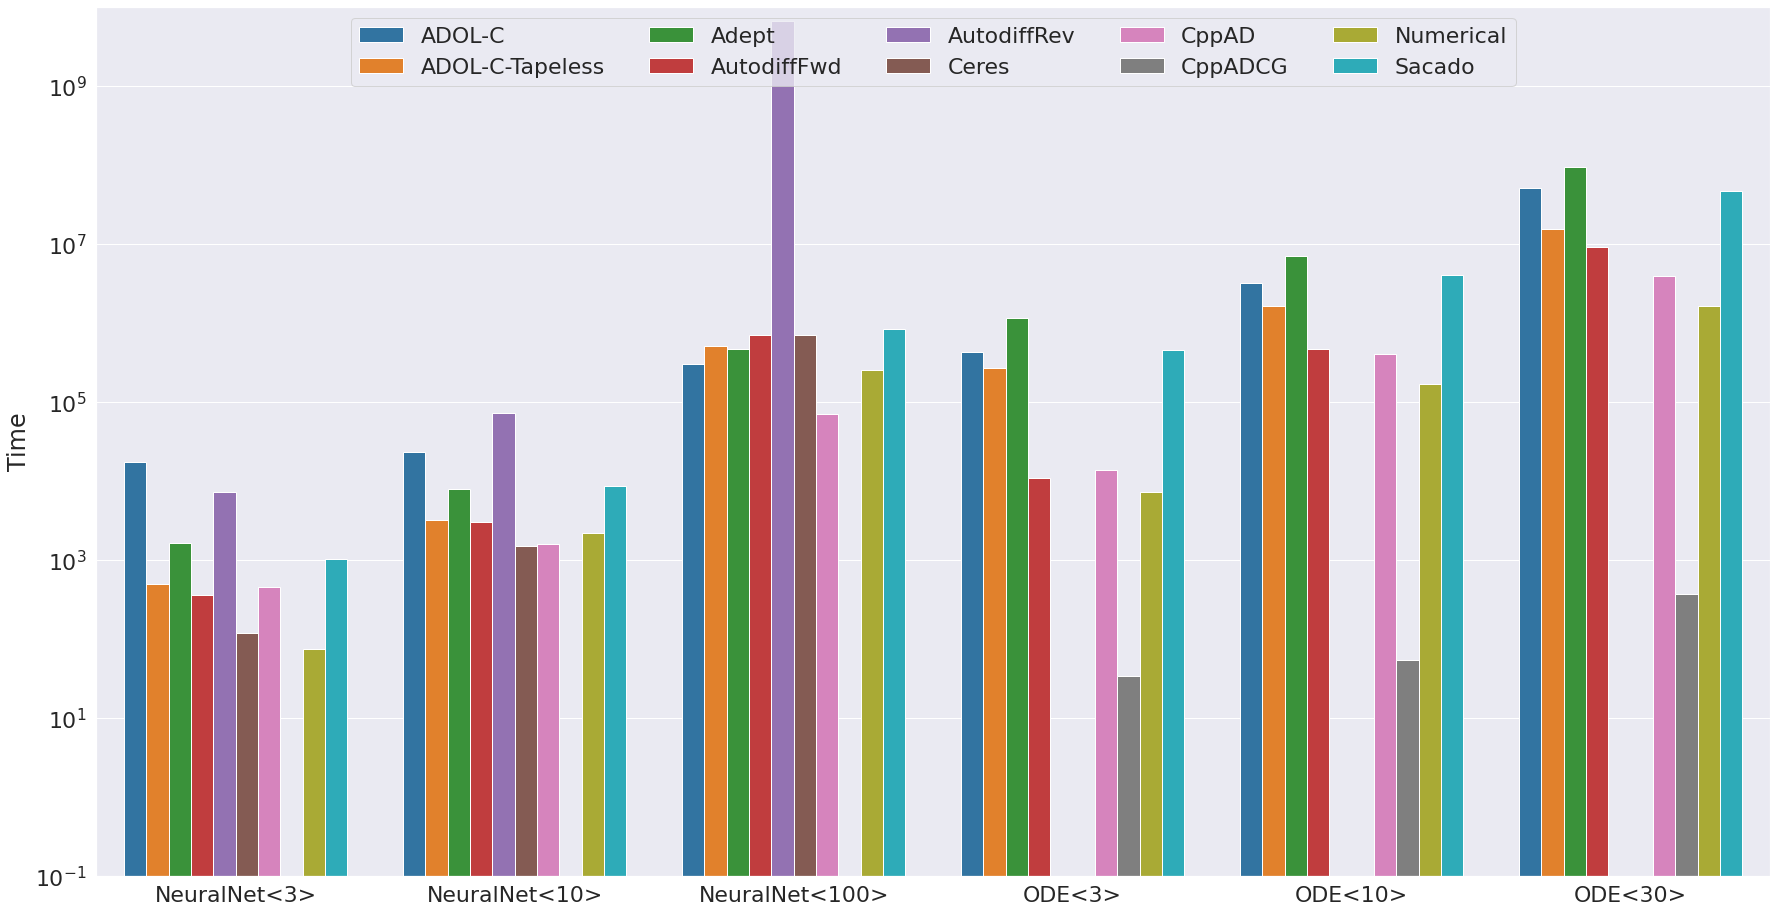

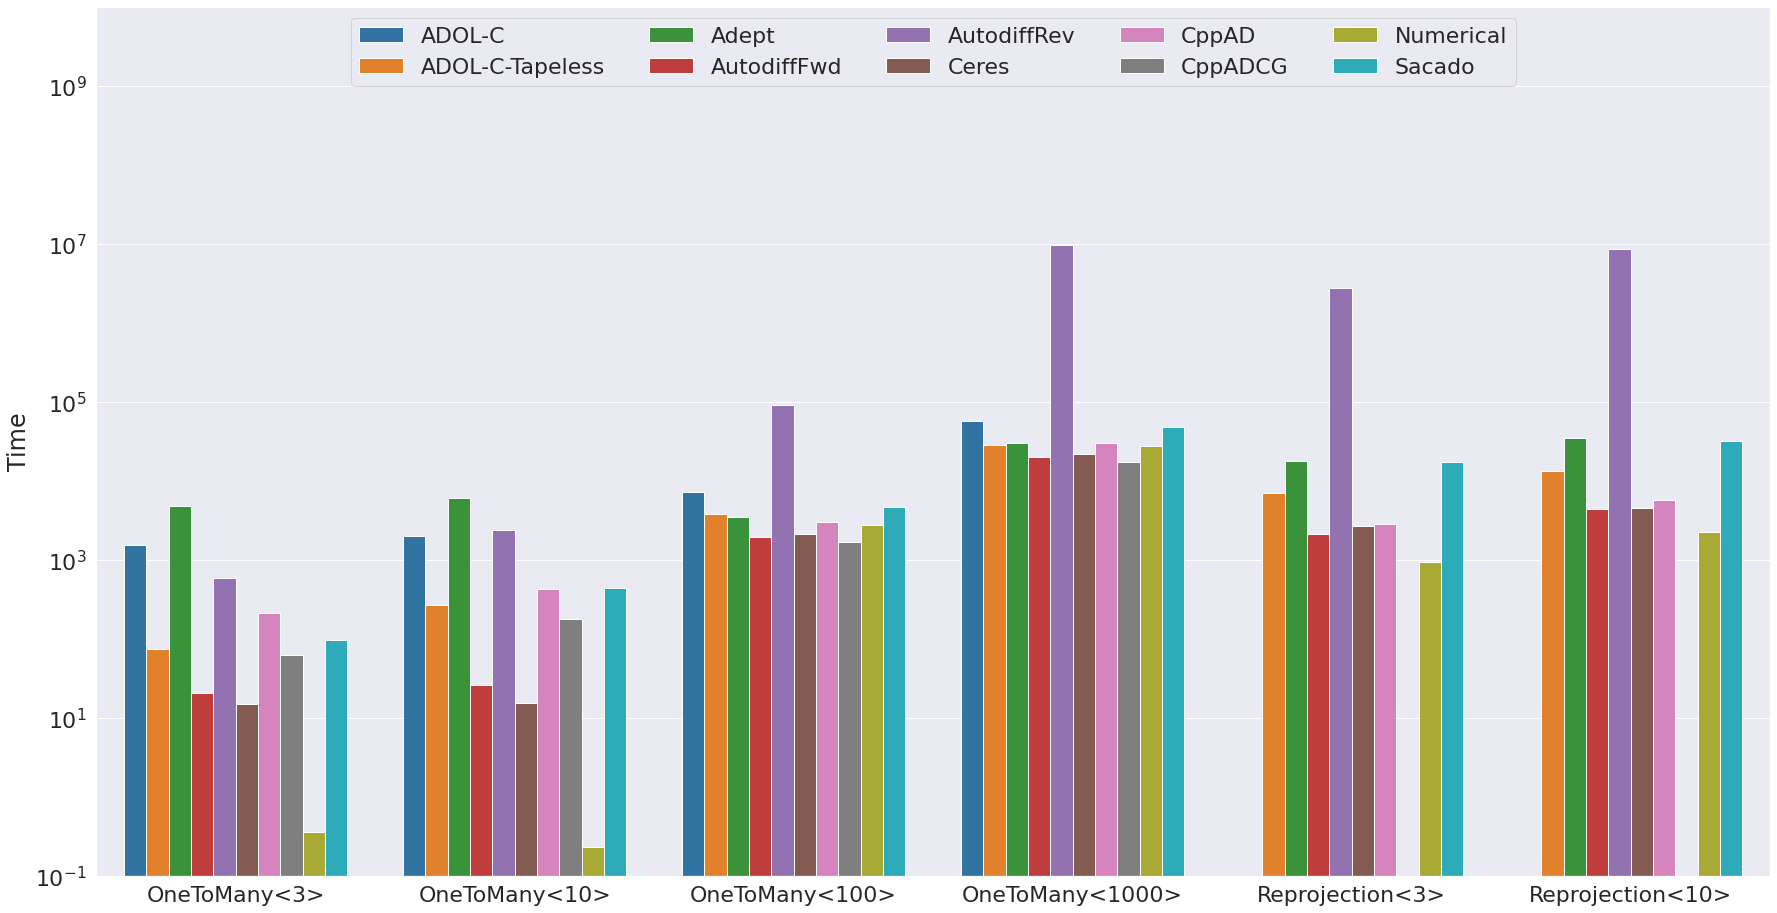

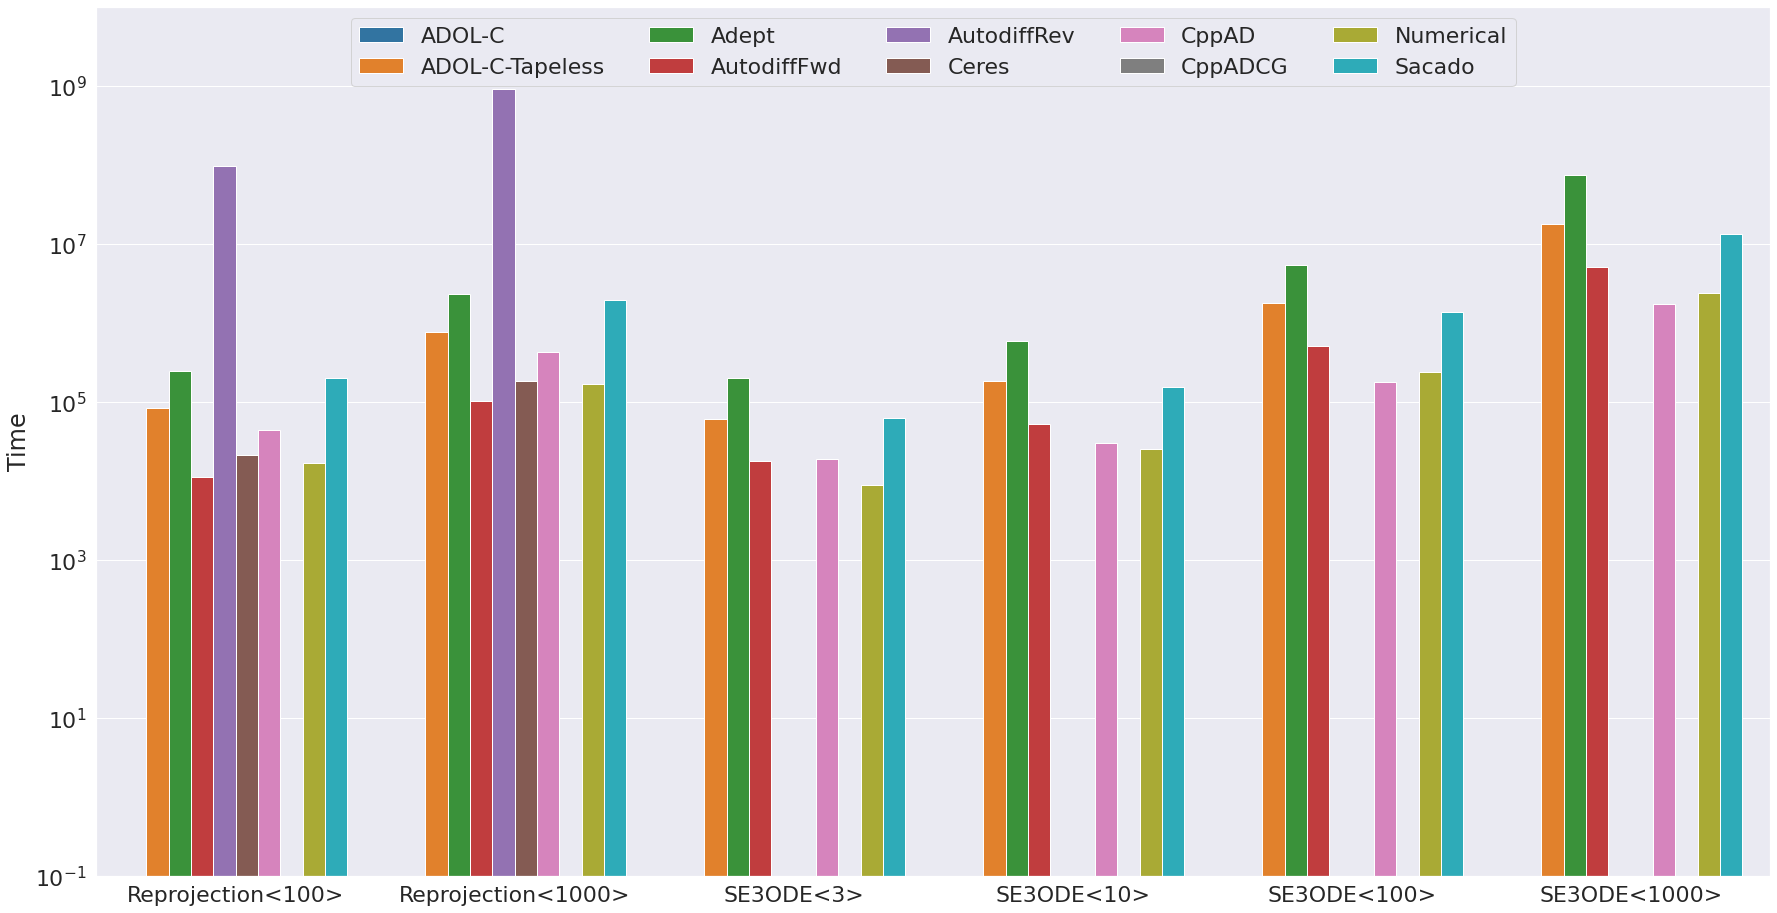

In [43]:
df = pd.read_csv('data', names=["Library", "Test", "Setup", "Calc"], sep='\s+')

# Fill in missing combinations with NaN
names = ['Test', 'Library']
mind = pd.MultiIndex.from_product([df['Test'].unique(), df['Library'].unique()], names=names)
df = df.set_index(names).reindex(mind, fill_value=np.nan).reset_index()

# Create columns for TestName and TestSize
df = pd.concat([df, df['Test'].str.extract(r'^(?P<TestName>\w+)<(?P<TestSize>.*)>')], axis=1)
df['TestSize'] = df['TestSize'].astype(int)

# Sort table
df = df.sort_values(['TestName', 'TestSize', 'Library'], ascending=[True, True, True])

tests = list(df['Test'].unique())

N = 6

for i in range((len(tests) + N - 1) // N):
    
    tests_i = tests[N*i:min(len(tests), N*(i+1))]

    plt.figure(figsize=(30,16))
    ax = sns.barplot(data=df[df['Test'].isin(tests_i)], x="Test", y="Calc", hue="Library")
    ax.set(yscale="log", xlabel="", ylabel="Time", ylim=(1e-1, 1e10))
    ax.legend(loc="upper center", shadow=False, ncol = (len(df["Library"].unique()) + 1) // 2)

    plt.show()